# Packages

In [1]:
from pathlib import Path
import requests
import pickle
import gzip
from matplotlib import pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as F
import math

import RNN_model

# Data import and pre-processing

In [2]:
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [3]:
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train.reshape(x_train.shape[0],28,28), y_train, x_valid.reshape(x_valid.shape[0],28,28), y_valid)
)

train_ds = TensorDataset(x_train, y_train)
n, c, temp = x_train.shape
bs = 2000  # batch size
train_dl = DataLoader(train_ds, batch_size=bs)

valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(valid_ds, batch_size=len(valid_ds))

# Network instantiation and training

In [4]:
n_inputs = 28
n_neurons = 200
n_outputs = 10
# The cross_entropy loss takes as input a N by C tensor (N observations with C class scores that are un-normalized, highest
# class score being the prediction) and a tensor of length N with the index of each class.
loss_func = F.cross_entropy
opt_func = optim.Adam
lr = 0.0005

model = RNN_model.RNN_classifier(n_inputs, n_neurons, n_outputs, loss_func, opt_func, lr)

In [5]:
print(model.accuracy(valid_dl))

tensor(0.1244)


Epoch:  0
Accuracy:  0.40869998931884766
Epoch:  1
Accuracy:  0.5591999888420105
Epoch:  2
Accuracy:  0.6079999804496765
Epoch:  3
Accuracy:  0.65829998254776
Epoch:  4
Accuracy:  0.7257999777793884
Epoch:  5
Accuracy:  0.753600001335144
Epoch:  6
Accuracy:  0.7840999960899353
Epoch:  7
Accuracy:  0.8172000050544739
Epoch:  8
Accuracy:  0.8432000279426575
Epoch:  9
Accuracy:  0.8557999730110168
Epoch:  10
Accuracy:  0.868399977684021
Epoch:  11
Accuracy:  0.8715999722480774
Epoch:  12
Accuracy:  0.8833000063896179
Epoch:  13
Accuracy:  0.8899000287055969
Epoch:  14
Accuracy:  0.8914999961853027
Epoch:  15
Accuracy:  0.8945000171661377
Epoch:  16
Accuracy:  0.8999000191688538
Epoch:  17
Accuracy:  0.9067000150680542
Epoch:  18
Accuracy:  0.910099983215332
Epoch:  19
Accuracy:  0.911899983882904
Epoch:  20
Accuracy:  0.9151999950408936
Epoch:  21
Accuracy:  0.9182000160217285
Epoch:  22
Accuracy:  0.9207000136375427
Epoch:  23
Accuracy:  0.9230999946594238
Epoch:  24
Accuracy:  0.9247000

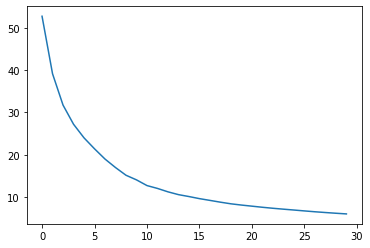

In [6]:
loss_array, parameters, hidden_states = model.fit(30,train_dl,valid_dl)

plt.plot(loss_array)

print(model.accuracy(valid_dl))

# Saving and loading a network

In [7]:
np.save(Path('data','params_ligneparligne.npy'),parameters)

In [8]:
torch.save({'state_dict': model.state_dict()}, Path('data','seqMNIST_lpl_200n'))

In [9]:
model1 = RNN_model.RNN_classifier(n_inputs, n_neurons, n_outputs, loss_func, opt_func, lr)

checkpoint = torch.load('data/seqMNIST_lpl_200n')
model1.load_state_dict(checkpoint['state_dict'])

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [10]:
print(model1.accuracy(valid_dl))

tensor(0.9349)


In [11]:
a=model1.get_params()

# Analysis

In [45]:
a_bs = 1  # batch size
a_train_dl = DataLoader(train_ds, batch_size=a_bs)
a_valid_dl = DataLoader(valid_ds, batch_size=a_bs)
len(analysis_ds)

10000

In [46]:
predictions = list()
hidden_states = list()
inputs = list()
expected = list()
loss = list()
# 3 outputs of forward (out.view(-1, self.n_outputs), self.hidden, rnn_out)
i=0;
for xb,yb in a_valid_dl:
    pred, hidden = model.forward(xb)
    inputs.append(xb)
    expected.append(yb)
    
    # loss is computed for a batch at the time and not a single input at the time
    loss.append(model.loss_func(pred, yb))
    predictions.append(pred)
    hidden_states.append(hidden)
    i=i+1

In [27]:
len(states0[0])

2000

In [35]:
b=states0[0].data.numpy()
b[2]

array([-3.60529  , -1.0166254, -1.179369 , -4.449674 ,  7.0962133,
       -3.194273 ,  1.0456275, -2.1580691,  1.0595174,  3.2945924],
      dtype=float32)

In [33]:
yb.data.numpy()

array([4, 7, 8, ..., 8, 4, 8], dtype=int64)

TypeError: len() of a 0-d tensor